# PCA: Principal Component Analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Graphics
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline 

In [4]:
## Preprocessing and modeling

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [5]:
# Warnings configuration
import warnings

warnings.filterwarnings('ignore')

## Getting data

In [7]:
USArrests = sm.datasets.get_rdataset('USArrests', 'datasets')

In [10]:
data = USArrests.data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [11]:
data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


#### Mean, variance and standard desviation

In [12]:
# Mean

data.mean(axis = 0)

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [13]:
# Variance
data.var(axis = 0)

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [14]:
# Standar desviation
data.std(axis = 0)

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

## Principal Component Analysis - PCA model

In [15]:
# PCA model training with data scaling

pca_pipeline = make_pipeline(StandardScaler(), PCA())
pca_pipeline.fit(data)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [16]:
modelo_pca = pca_pipeline.named_steps['pca']

In [18]:
modelo_pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [20]:
pd.DataFrame(
    modelo_pca.components_,
    columns = data.columns,
    index = ['PC1', 'PC2', 'PC3','PC4' ]
)

# PC1 = 0.535899*Murder + 0.583184*Assault + 0.278191*UrbanPop + 0.543432*Rape

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


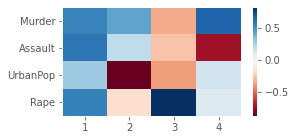

In [22]:
# Heat map of the coefficients to be able to interpret them

fix, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 2))
components = modelo_pca.components_
plt.imshow(components.T, cmap = 'RdBu', aspect = 'auto')
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()
plt.show()


In [23]:
# How much information (variance) each component has

print('Variance of each component')
print(modelo_pca.explained_variance_ratio_)

Variance of each component
[0.62006039 0.24744129 0.0891408  0.04335752]


In [24]:
# Cumulative variance

prop_variance = modelo_pca.explained_variance_ratio_.cumsum()
prop_variance

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

Text(0, 0.5, 'Percentage')

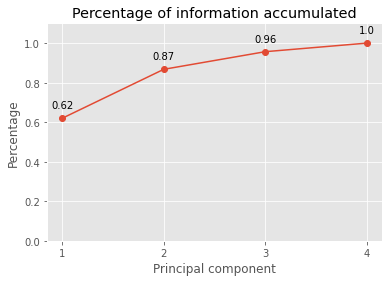

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 4))

ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_variance,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) +1 , prop_variance):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords = 'offset points',
        xytext = (0, 10),
        ha = 'center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Percentage of information accumulated')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage')

In [28]:
# projection of observations

projections = pca_pipeline.transform(X = data)
projections = pd.DataFrame(
    projections,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index = data.index
)
projections.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [ ]:
# Build a diagram BIPLOT to interpret the results
